# Playing around with the data available at https://population.un.org/wpp/Download/Standard/MostUsed/

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
raw_df = pd.read_excel(
    "WPP2022_FERT_F01_FERTILITY_RATES_BY_SINGLE_AGE_OF_MOTHER.xlsx",
    skiprows=16,
)

In [125]:
ages = range(15, 50)
years = range(1950, 2021 + 1)
df = ((raw_df[
    (raw_df['Region, subregion, country or area *'] == "WORLD") & 
    (raw_df['Year'].isin(years))
][ages]).T)
df.columns = years
df /= 1_000
df["Age"] = df.index
df = df.reset_index(drop=True)

Text(0, 0.5, 'Probability of having a birth')

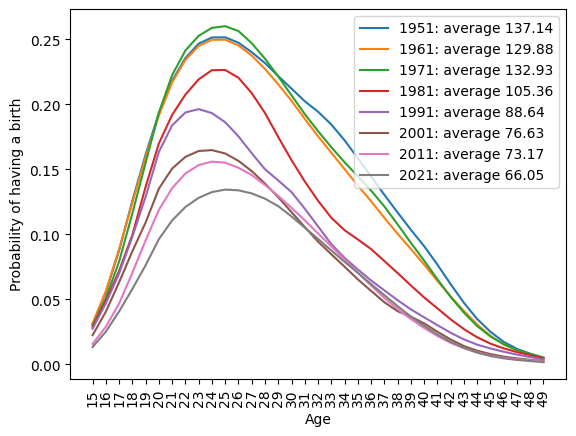

In [126]:
plt.figure()
for i, column in enumerate(df.columns):
    if column != "Age" and (i % 10 == 1):
        plt.plot(df[column], label=f"{column}: average {np.mean(df[column] * 1000):0.2f}")
plt.legend()
plt.xticks(df.index, labels=df["Age"], rotation=90)
plt.xlabel("Age")
plt.ylabel("Probability of having a birth")

In [130]:
{row["Age"]: row[2021] for i, row in df.iterrows()}

{15: 0.013355,
 16: 0.025160000000000002,
 17: 0.040733,
 18: 0.058070000000000004,
 19: 0.07627800000000001,
 20: 0.096371,
 21: 0.110794,
 22: 0.12112600000000001,
 23: 0.12814699999999998,
 24: 0.13259,
 25: 0.134492,
 26: 0.133936,
 27: 0.131562,
 28: 0.127503,
 29: 0.121737,
 30: 0.113844,
 31: 0.105234,
 32: 0.096591,
 33: 0.087627,
 34: 0.078933,
 35: 0.07048399999999999,
 36: 0.061793999999999995,
 37: 0.053277,
 38: 0.044770000000000004,
 39: 0.036818,
 40: 0.029645,
 41: 0.023043,
 42: 0.017268000000000002,
 43: 0.012609,
 44: 0.009054,
 45: 0.006445,
 46: 0.0046559999999999995,
 47: 0.003414,
 48: 0.0025670000000000003,
 49: 0.0017}